# TP1 Calcul Scientifique

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy.linalg import inv

## Méthode des différences finies

Données :
- J : nombre de pas espace
- N : nombre de pas de temps
- T : borne temporelle
- a : coefficient >0 dans l'équation de diffusion

In [2]:
T = 1.0 # borne temporelle

In [3]:
def calcul_delta_t(delta_x, theta=0.5):
    # ------------------------------------------------------
    # calcul delta_t en fonction de theta et de delta_x,
    # en fonction des conditions de stabilité de Von Neumann
    # ------------------------------------------------------
    if theta >= 0.5:
        print("aucune condition sur delta_t !")
        return 1/2*delta_x**2 *0.5  # *0.5 arbitraire
    if (theta < 0.5) & (theta >=0):
        return 0.95*(delta_x)**2/(2*(1-2*theta))  
        # le 0.95 pour éviter les erreurs d'arrondis qui sortent delta_t des conditions de stabilité
    print ("mauvaise valeur de theta")
    return 0

In [4]:
def calcul_matA(J, a=0):
    # calcule et retourne la matrice A
    delta_x = 1/J
    # créé la matrice A taille JxJ avec 2+a.delta_x**2 sur la diagonale
    matA = np.diagflat(np.full((1,J),2+a*delta_x**2))
    for i in range(J-1):
        matA[i+1,i]=-1
        matA[i,i+1]=-1
    matA[0,1]=-2
    matA = 1/delta_x**2 * matA
    return matA

In [5]:
matA = calcul_matA(5,.2)
print(matA)

[[ 50.2 -50.    0.    0.    0. ]
 [-25.   50.2 -25.    0.    0. ]
 [  0.  -25.   50.2 -25.    0. ]
 [  0.    0.  -25.   50.2 -25. ]
 [  0.    0.    0.  -25.   50.2]]


In [6]:
def calcul_vectU_init(J):
    # calcule et retourne le vecteur U^0 des valeurs approchées à t=0
    vectU_init = np.zeros((J,1))
    delta_x = 1/J
    for i in range(J):
        vectU_init[i]=math.cos(math.pi/2*i*delta_x)
    return vectU_init    

In [7]:
calcul_vectU_init(5)

array([[1.        ],
       [0.95105652],
       [0.80901699],
       [0.58778525],
       [0.30901699]])

In [8]:
def next_step(vectUn,inv_mat_U_nplusun,mat_Un,theta=0.5):
    # calcule et retourne le vecteur U**n+1
    # on passe en paramètres les matrices inv_mat_U_n+1 = (I/delta_t + theta.A)^(-1)
    # et mat_U_n = (I/delta_t - (1-theta).A)
    return np.matmul(inv_mat_U_nplusun,np.matmul(mat_Un,vectUn))

In [9]:
a = np.array(([0,1,2],[2,3,5],[6,8,4]))
b = np.array(([-1,3,5],[4,8,6],[0,0,1]))
v = np.array((1,2,3))
print (np.matmul(a,np.matmul(b,v)))

[ 44 169 436]


In [10]:
print(next_step(v,a,b))

[ 44 169 436]


In [11]:
def affiche_solution_explicite(J=100,a=0,t=0.0):
    # affiche la solution explicite à l'instant t
    # on passe en paramètres le nombre de pas d'espace, le paramètre a>0, et l'instant t
    param = -(math.pi**2/4+a)
    u = [math.cos(math.pi/2*(x/J))*math.exp(param*t) for x in range(0,int(J))]
    # print(u)
    plt.figure(figsize=(5,5))
    axe_x = [(x/J) for x in range(0,int(J))]
    plt.plot(axe_x,u)
    axes = plt.gca()
    axes.set_ylim([0.0,1.1])
    plt.xlabel('espace x')
    plt.ylabel('valeur fonction')
    plt.title('solution exacte à t='+str(t)+' (a='+str(a)+')')
    plt.show()

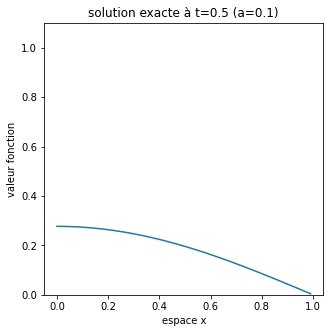

In [12]:
affiche_solution_explicite(100,a=0.1,t=0.5)

In [13]:
def affiche_solution_approchee(Un,J=100,t=0):
    # affiche la solution approchée Un
    plt.figure(figsize=(5,5))
    axe_x = [(x/J) for x in range(0,int(J))]
    plt.plot(axe_x,Un)
    axes = plt.gca()
    axes.set_ylim([0.0,1.1])
    plt.xlabel('espace x')
    plt.ylabel('valeur fonction')
    plt.title('solution approchée à t='+str(t))
    plt.show()

In [14]:
def vecteur_erreur(vectUn,J, t=0.0):
    # calcule et retourne vecteur erreur = U^n - (u(0,t),u(1/J,t),...u(J-1 / J,t))
    param = -(math.pi**2/4+a)
    exact = [math.cos(math.pi/2*(x/J))*math.exp(param*t) for x in range(0,int(J))]
    return [x-y for x,y in zip(vectUn,exact)]

In [15]:
a=0
J=100
t=0.2
param = -(math.pi**2/4+a)
exact = [math.cos(math.pi/2*(x/J))*math.exp(param*t) for x in range(0,int(J))]
print(vecteur_erreur(exact,100,t=0.2))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [16]:
def norme_inf(v):
    # retourne norme inf du vecteur v
    v_abs = [np.abs(x) for x in v ]
    return max(v_abs)

In [17]:
def run_theta_schema(J=100,T=1.0,a=0,theta=0.0):
    
    delta_x = 1.0/J
    delta_t = calcul_delta_t(delta_x, theta)
    N=int(T/delta_t) # nombre de pas de temps
    print('theta = ', theta)
    print('nombre pas de temps = '+str(N))
    print('delta_x =', delta_x)
    print('delta_t =', delta_t)
    matA = calcul_matA(J,a)
    I = np.diagflat(np.full((1,J),1)) # matrice identité JxJ
    inv_mat_U_nplusun = inv(1/delta_t * I + theta * matA)
    mat_Un = 1/delta_t * I - (1-theta) * matA
    Un = calcul_vectU_init(J)  # vecteur U à t=0
    err_over_time = []
    
    for t in range(0,N):
        # print('instant t=',t/N)
        U_nplusun = np.copy(next_step(Un,inv_mat_U_nplusun,mat_Un,theta))
        nb_aff = 3  # nombre de courbes intérmédiaires que l'on veut afficher
        inter_aff = int(N/nb_aff)  # intervalle entre les affichages des courbes
        if t%inter_aff==0:
            temps=t/N
            affiche_solution_approchee(Un,J,temps)
            affiche_solution_explicite(J,a,temps)
        err = vecteur_erreur(U_nplusun,J,t/N)
        err_over_time = np.append(err_over_time,norme_inf(err)) # liste de la norme inf de l'erreur
        #print('erreur = ',max(err))
        Un = U_nplusun

    plt.figure(figsize=(10,10))
    axe_x = [t for t in range(0,int(N))]
    plt.plot(axe_x,err_over_time)
    axes = plt.gca()
    # axes.set_ylim([0.0,1.1])
    plt.xlabel('epoch')
    plt.ylabel('valeur')
    plt.title('norme inf de l"erreur (J='+str(J)+';theta='+str(theta)+';a='+str(a)+')')
    plt.grid()
    plt.show()
    # print("erreur en fin d'algo = "+str(norme_inf(err_over_time)))

theta =  0
nombre pas de temps = 21052
delta_x = 0.01
delta_t = 4.75e-05


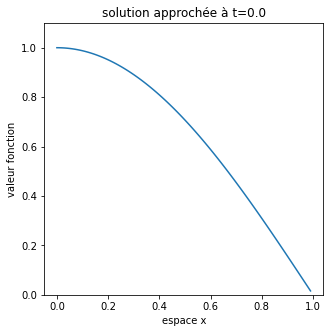

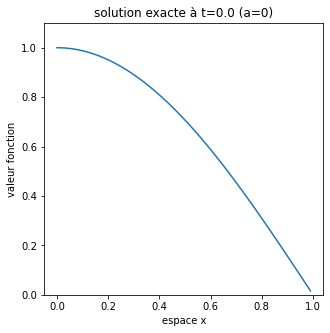

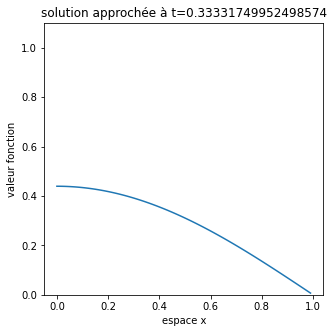

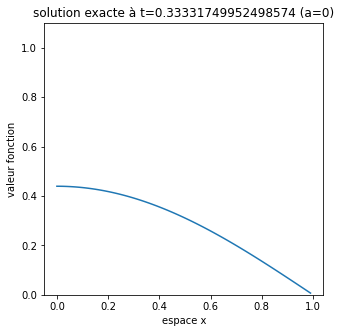

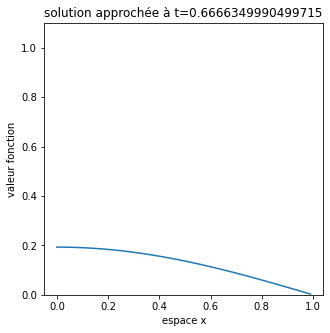

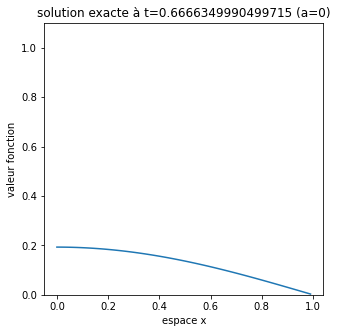

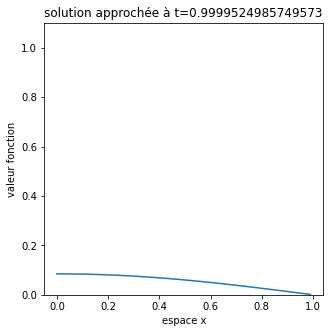

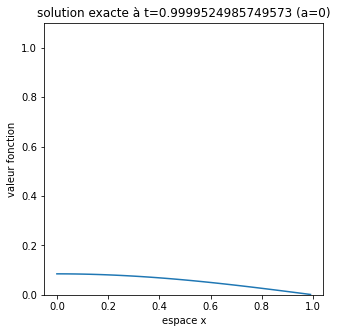

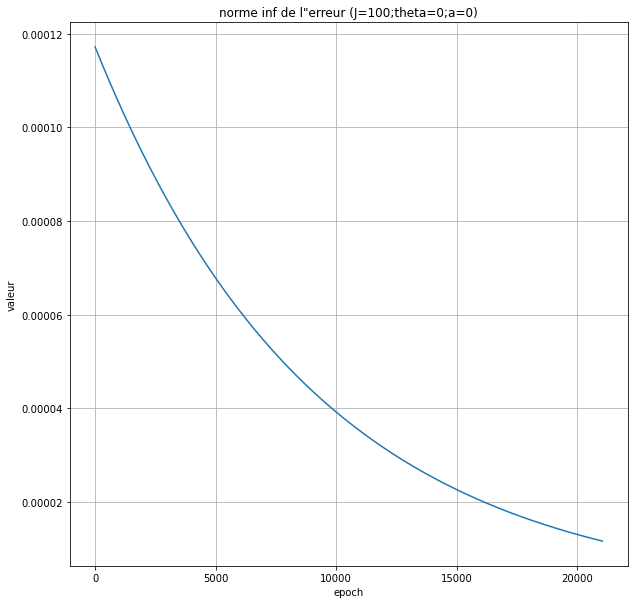

In [18]:
run_theta_schema(J=100,T=1.0,a=0,theta=0)

aucune condition sur delta_t !
theta =  0.5
nombre pas de temps = 40000
delta_x = 0.01
delta_t = 2.5e-05


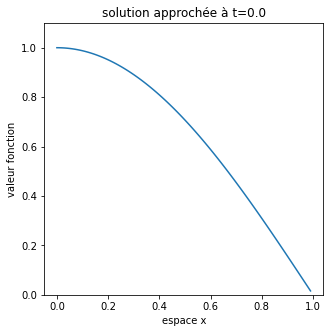

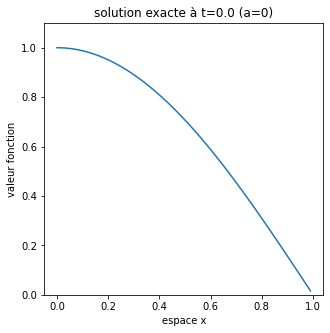

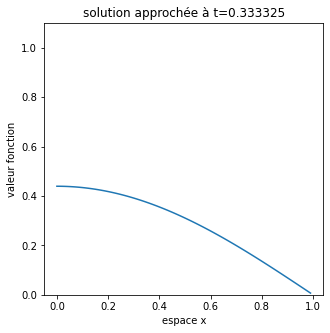

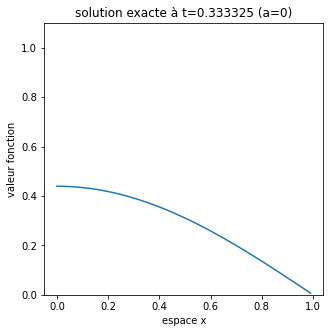

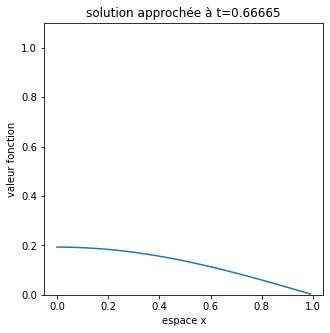

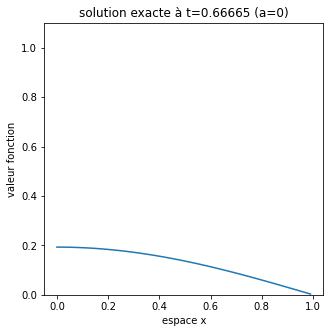

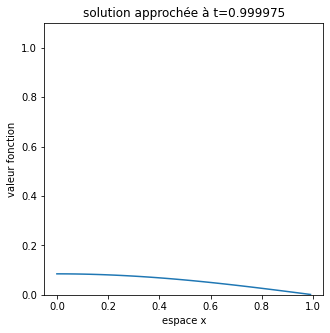

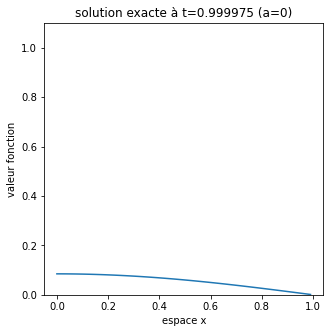

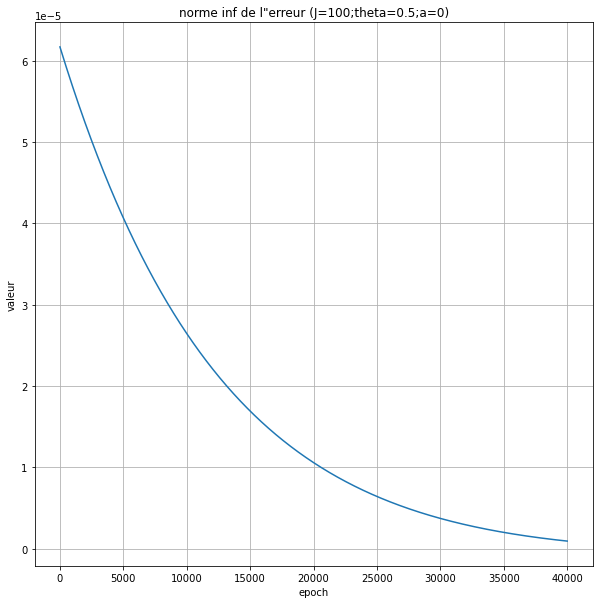

In [19]:
run_theta_schema(J=100,T=1.0,a=0,theta=0.5)

aucune condition sur delta_t !
theta =  1
nombre pas de temps = 40000
delta_x = 0.01
delta_t = 2.5e-05


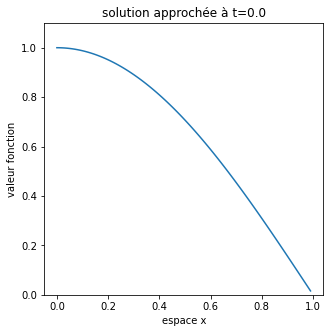

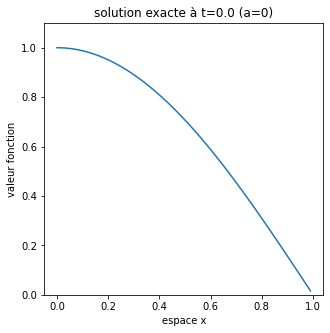

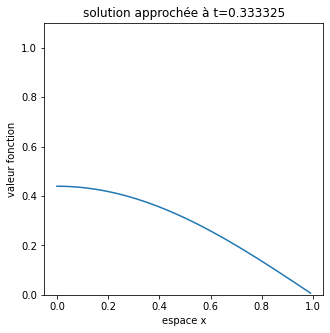

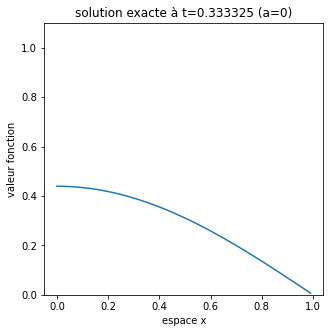

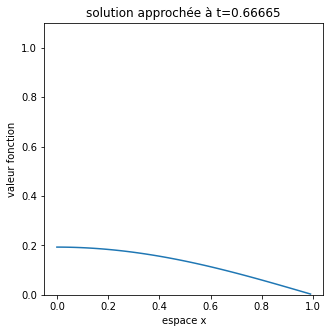

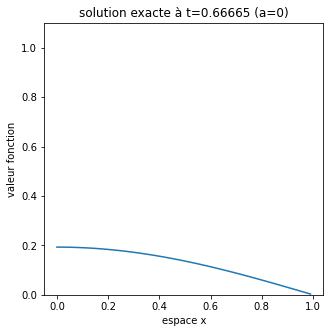

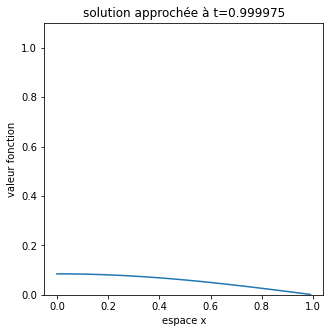

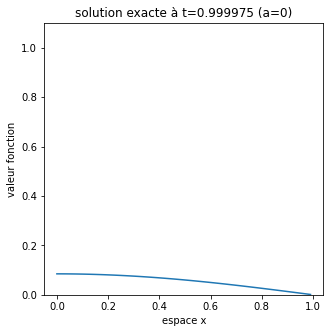

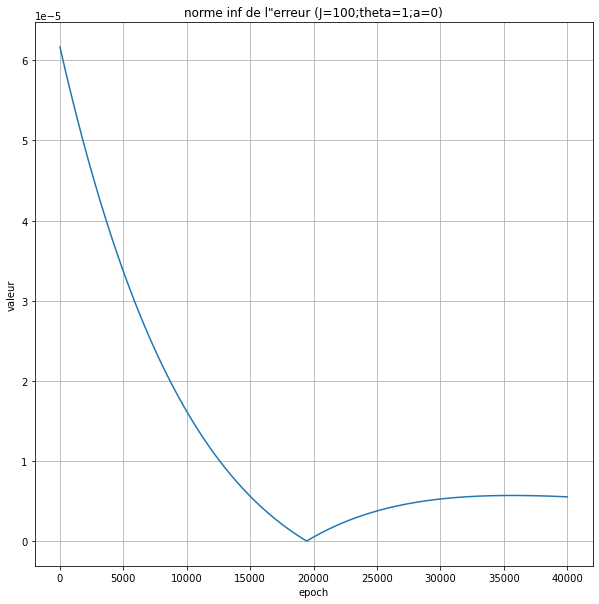

In [20]:
run_theta_schema(J=100,T=1.0,a=0,theta=1)